<a href="https://colab.research.google.com/github/ajmd2/Jinling-Enlightenment/blob/main/rl/Policy_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

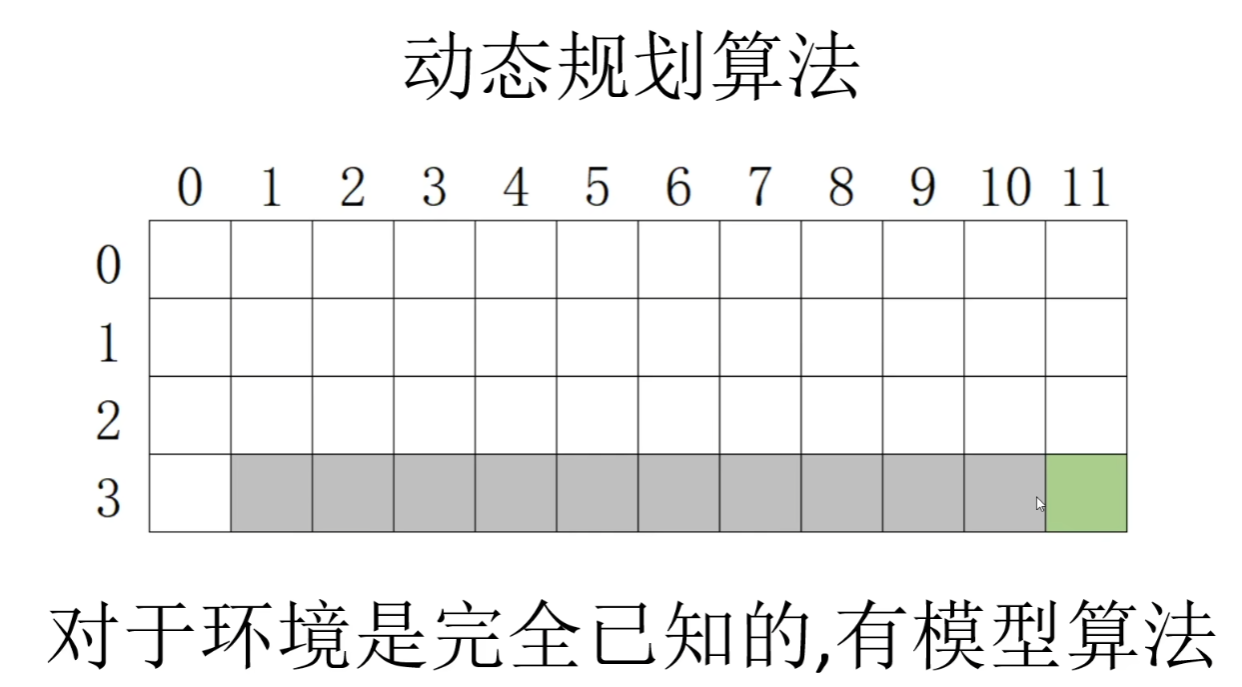

In [18]:
def get_state(row,col):
  if row !=3:
    return 'ground'

  if row ==3 and col ==0:
    return 'ground'

  if row == 3 and col ==11:
    return 'terminal'


  return 'trap'

get_state(0,0)

'ground'

In [19]:
def move(row,col,action):

  # 未执行action 前
  if get_state(row,col) in ['trap','terminal']:
    return row,col,0

  if action == 0: # 上
    row -=1
  if action == 1: # 下
    row +=1
  if action == 2: # 左
    col -=1
  if action == 3: # 右
    col +=1

  row = max(0,row)
  row = min(3,row)
  col = max(0,col)
  col = min(11,col)

  # 执行action 后

  reward =-1
  if get_state(row,col) == 'trap':
    reward =-100

  return row,col,reward


In [ ]:
import numpy as np

#初始化每个格子的价值
values = np.zeros([4,12])

# 初始化每个格子下采用动作的概率
pi = np.ones([4,12,4])*0.25

values, pi[0]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]))

In [20]:
def get_qsa(row,col,action):
  next_row, next_col, reward = move(row,col,action)

  value = values[next_row,next_col]*0.9

  if get_state(next_row,next_col) in ['trap','terminal']:
     value = 0

  return value + reward # q = r + gamma* v(s_t+1)

get_qsa(0,0,0)

-7.94108867905351

In [21]:
# 策略评估
def get_values():

  new_values = np.zeros([4,12])

  for row in range(4):
    for col in range(12):
      # 准对每一个格子
      action_value = np.zeros(4)

      for action in range(4):
        action_value[action] = get_qsa(row,col,action)

      # 每个动作的分数和它的概率相乘
      action_value *= pi[row,col]

      new_values[row,col] = action_value.sum() # s也就是状态价值函数等于 （定义上等于）其包含的所有动作价值的概率加权平均
  return new_values

get_values()


array([[-7.71232075, -7.45813417, -7.17570464, -6.86189404, -6.5132156 ,
        -6.12579511, -5.6953279 , -5.217031  , -4.68559   , -4.0951    ,
        -3.439     , -2.71      ],
       [-7.45813417, -7.17570464, -6.86189404, -6.5132156 , -6.12579511,
        -5.6953279 , -5.217031  , -4.68559   , -4.0951    , -3.439     ,
        -2.71      , -1.9       ],
       [-7.17570464, -6.86189404, -6.5132156 , -6.12579511, -5.6953279 ,
        -5.217031  , -4.68559   , -4.0951    , -3.439     , -2.71      ,
        -1.9       , -1.        ],
       [-7.45813417,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [22]:
# 策略提升
def get_pi():
  new_pi = np.zeros([4,12,4])

  for row in range(4):
    for col in range(12):

      action_value = np.zeros(4)

      for action in range(4):
        action_value[action] = get_qsa(row,col,action)

        count = (action_value == action_value.max()).sum()

        for action in range(4):
           if action_value[action] == action_value.max():
              new_pi[row,col,action] = 1/ count
           else:
             new_pi[row,col,action] = 0


  return new_pi

get_pi()

array([[[0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 1.  , 0.  , 0.  ]],

       [[0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 0.5 , 0.  , 0.5 ],
        [0.  , 1.  , 0.  , 0.  ]],

       [[0.  , 0.  , 0.  , 1.  ],
        [0.  , 0.  , 0.  , 1.  ],
        [0.  , 0.  , 0.  , 1.  ],
        [0.  , 0.  , 0.  , 1.  ],
        [0.  , 0.  , 0.  , 1.  ],
        [0

训练的过程

1先反复评估状态价值函数v(s) 使用 get_values(),需要 pi 和qsa(估计动作价值函数Q)

2再来更新策略pi 使用 get_pi 来迭代策略

In [23]:
for _ in range(10):
  for _ in range(100):
    values = get_values()
  pi = get_pi()

values,pi

(array([[-7.71232075, -7.45813417, -7.17570464, -6.86189404, -6.5132156 ,
         -6.12579511, -5.6953279 , -5.217031  , -4.68559   , -4.0951    ,
         -3.439     , -2.71      ],
        [-7.45813417, -7.17570464, -6.86189404, -6.5132156 , -6.12579511,
         -5.6953279 , -5.217031  , -4.68559   , -4.0951    , -3.439     ,
         -2.71      , -1.9       ],
        [-7.17570464, -6.86189404, -6.5132156 , -6.12579511, -5.6953279 ,
         -5.217031  , -4.68559   , -4.0951    , -3.439     , -2.71      ,
         -1.9       , -1.        ],
        [-7.45813417,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ]]),
 array([[[0.  , 0.5 , 0.  , 0.5 ],
         [0.  , 0.5 , 0.  , 0.5 ],
         [0.  , 0.5 , 0.  , 0.5 ],
         [0.  , 0.5 , 0.  , 0.5 ],
         [0.  , 0.5 , 0.  , 0.5 ],
         [0.  , 0.5 , 0.  , 0.5 ],
         [0.  , 0.5 , 0.  , 0.5 ],
         [0.  , 0

In [28]:
def show(row, col, action):
    graph = [ '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□',
        '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□',
        '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□',
        '□', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '❤']


    action = {0: '↑', 1: '↓', 2: '←', 3: '→'}[action] # Dictionary Lookup
    graph[row * 12 + col] = action

    graph = ''.join(graph) # 取消，间隔

    for i in range(0,4*12,12): # 成行打印
      print(graph[i:i+12])

show(1,1,0)



□□□□□□□□□□□□
□↑□□□□□□□□□□
□□□□□□□□□□□□
□○○○○○○○○○○❤


In [32]:
from IPython import display
import time

def test():
  row = 0
  col = 0

  for _ in range(200):

    action = np.random.choice(np.arange(4),size=1,p= pi[row,col])[0]

    display.clear_output(wait =True)
    time.sleep(1)
    show(row,col,action)

    row,col, reward = move(row,col,action)

    if get_state(row,col) in ['trap','terminal']:
      break
test()

□□□□□□□□□□□□
□□□□□□□□□□□□
□□□□□□□□□□□↓
□○○○○○○○○○○❤


In [34]:
for row in range(4):
  line = ''
  for col in range(12):
    action = pi[row,col].argmax()
    action = {0: '↑', 1: '↓', 2: '←', 3: '→'}[action]
    line += action
  print(line)

↓↓↓↓↓↓↓↓↓↓↓↓
↓↓↓↓↓↓↓↓↓↓↓↓
→→→→→→→→→→→↓
↑↑↑↑↑↑↑↑↑↑↑↑


最后写下来感觉很像动态规划

上面是策略迭代，下面写一下价值迭代

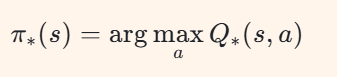

In [36]:
# 策略评估
def get_values_2():

  new_values = np.zeros([4,12])

  for row in range(4):
    for col in range(12):
      # 准对每一个格子
      action_value = np.zeros(4)

      for action in range(4):
        action_value[action] = get_qsa(row,col,action)

      # # 每个动作的分数和它的概率相乘
      # action_value *= pi[row,col]

      # new_values[row,col] = action_value.sum() # s也就是状态价值函数等于 （定义上等于）其包含的所有动作价值的概率加权平均
      new_values[row,col] = action_value.max() # s 直接等于Q价值最大的情况


  return new_values

get_values_2()


array([[-7.71232075, -7.45813417, -7.17570464, -6.86189404, -6.5132156 ,
        -6.12579511, -5.6953279 , -5.217031  , -4.68559   , -4.0951    ,
        -3.439     , -2.71      ],
       [-7.45813417, -7.17570464, -6.86189404, -6.5132156 , -6.12579511,
        -5.6953279 , -5.217031  , -4.68559   , -4.0951    , -3.439     ,
        -2.71      , -1.9       ],
       [-7.17570464, -6.86189404, -6.5132156 , -6.12579511, -5.6953279 ,
        -5.217031  , -4.68559   , -4.0951    , -3.439     , -2.71      ,
        -1.9       , -1.        ],
       [-7.45813417,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])